In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
# Ques 1
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Ques 2
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# here few misconcuption is there like BMI can not be zero,Glu ose,Insulin can't be zero so let's try to fix it 
# now replacing zero values with the mean of column 
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())





In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

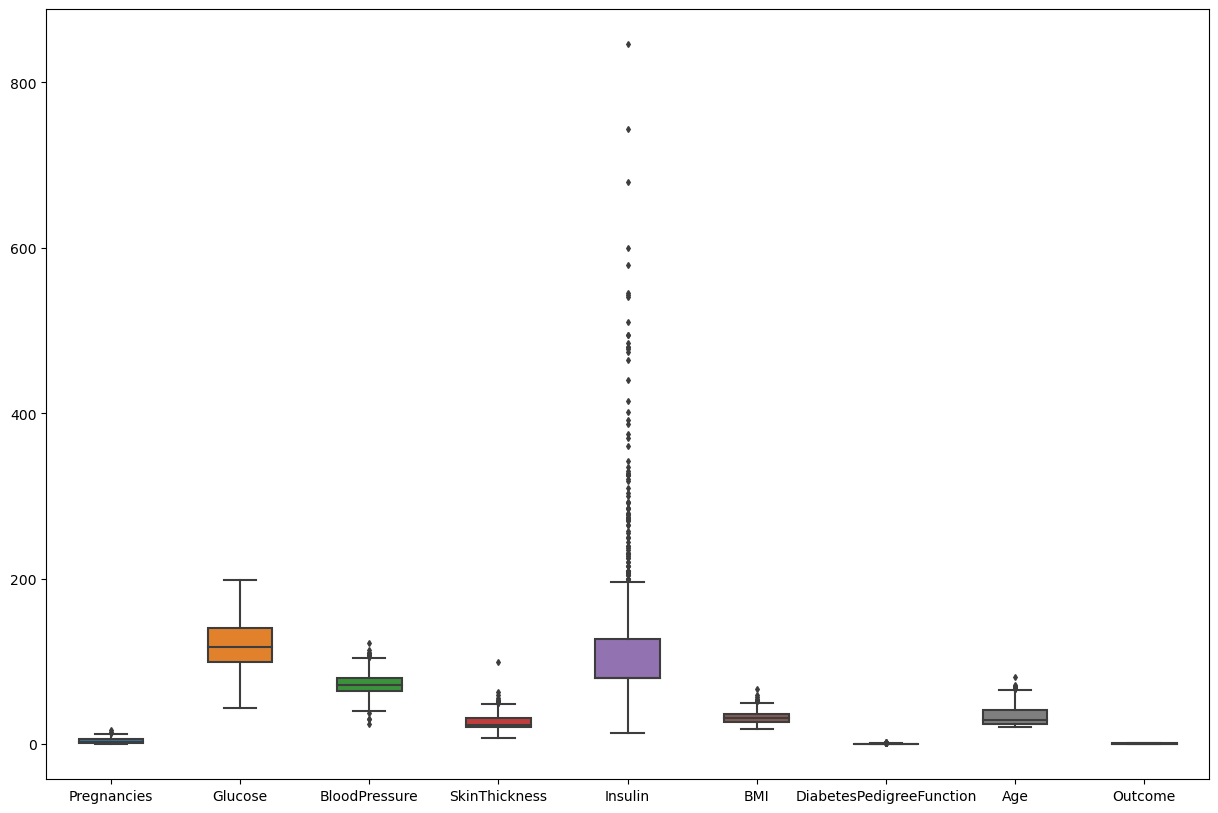

In [10]:
# now we have dealt with the 0 values and data looks better but , there still are outlier present in some column .lets visualize
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax, fliersize=3)

In [11]:
# Ques 3
# segregate the dependent and independent variable 
X=data.drop(columns=['Outcome'])
y=data['Outcome']

In [12]:
# segregate data into train and test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Post Pruning 
treeclassifier=DecisionTreeClassifier()

In [15]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=treeclassifier.predict(X_test)

In [17]:

from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.75974026, 0.73376623, 0.75974026, 0.80392157, 0.77124183])

[Text(0.5525873655913979, 0.975, 'x[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.23555107526881722, 0.925, 'x[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(0.09879032258064516, 0.875, 'x[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(0.03225806451612903, 0.825, 'x[0] <= 7.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.021505376344086023, 0.775, 'x[6] <= 0.672\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.010752688172043012, 0.725, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.03225806451612903, 0.725, 'x[6] <= 0.685\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.021505376344086023, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.043010752688172046, 0.675, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.043010752688172046, 0.775, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16532258064516128, 0.825, 'x[1] <= 127.5\ngini = 0.324\nsamples = 128\nvalue = 

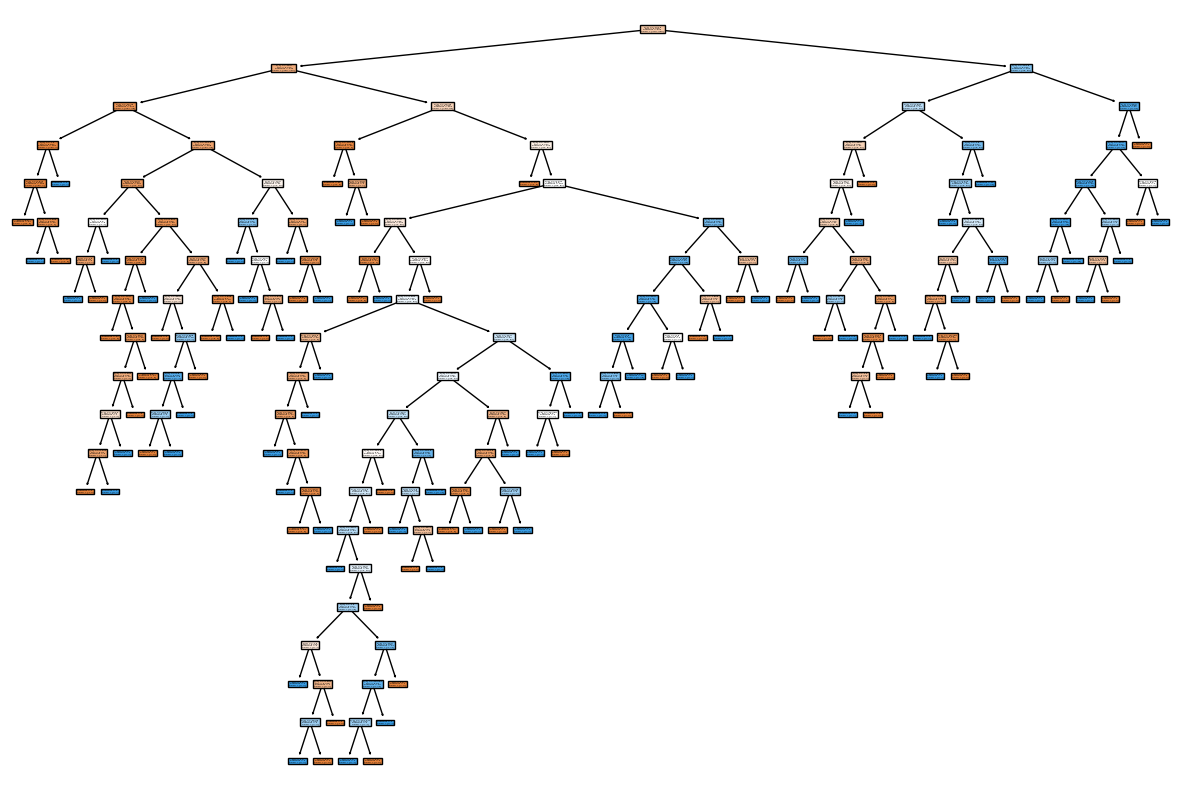

In [18]:
#Ques 4 
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [20]:
# Post Pruning  with max depth
treeclassifier=DecisionTreeClassifier(max_depth=6)
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

[Text(0.5625, 0.9285714285714286, 'x[1] <= 144.5\ngini = 0.459\nsamples = 576\nvalue = [370, 206]'),
 Text(0.30288461538461536, 0.7857142857142857, 'x[7] <= 28.5\ngini = 0.372\nsamples = 445\nvalue = [335, 110]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[5] <= 30.45\ngini = 0.21\nsamples = 235\nvalue = [207, 28]'),
 Text(0.057692307692307696, 0.5, 'x[0] <= 7.0\ngini = 0.037\nsamples = 107\nvalue = [105, 2]'),
 Text(0.038461538461538464, 0.35714285714285715, 'x[6] <= 0.672\ngini = 0.019\nsamples = 106\nvalue = [105, 1]'),
 Text(0.019230769230769232, 0.21428571428571427, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.057692307692307696, 0.21428571428571427, 'x[5] <= 23.5\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.038461538461538464, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07692307692307693, 0.07142857142857142, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.07692307692307693, 0.35714285714285715, 'gini = 0.0\nsamples = 

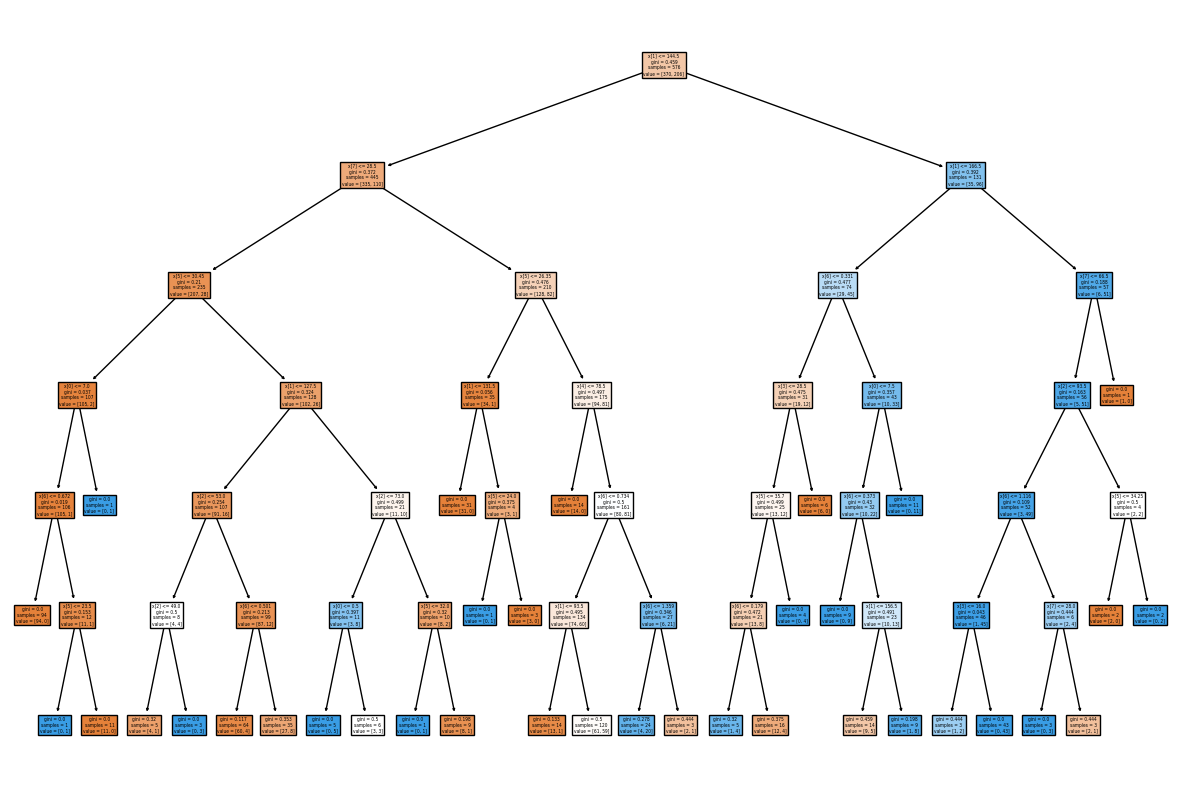

In [21]:
from sklearn import tree 
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [22]:
# Ques 5 
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
score

0.765625

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter' :['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}


In [25]:
from sklearn.model_selection import GridSearchCV
treeclassifier=DecisionTreeClassifier()
clf=GridSearchCV(treeclassifier,param_grid=parameter,cv=5,scoring='accuracy')

In [26]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [28]:
y_pred=clf.predict(X_test)

In [29]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7291666666666666


In [30]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       148
           1       0.44      0.61      0.51        44

    accuracy                           0.73       192
   macro avg       0.65      0.69      0.66       192
weighted avg       0.77      0.73      0.74       192



In [33]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier(random_state=42)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Step 1: Data Preprocessing
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Handle missing values (if any)
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and Train the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(report)

# Visualize the decision tree (for interpretability)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.title("Decision Tree")
plt.show()


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

